### 1. Импортируем необходимые библиотеки, загружаем данные из файла, подготавливаемся к анализу и моделированию.

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

df = pd.read_csv('dz.csv')




### 2. Создаем корреляционную матрицу для числовых столбцов, чтобы визуализировать взаимосвязи между признаками и выявить их корреляцию с целевой переменной.

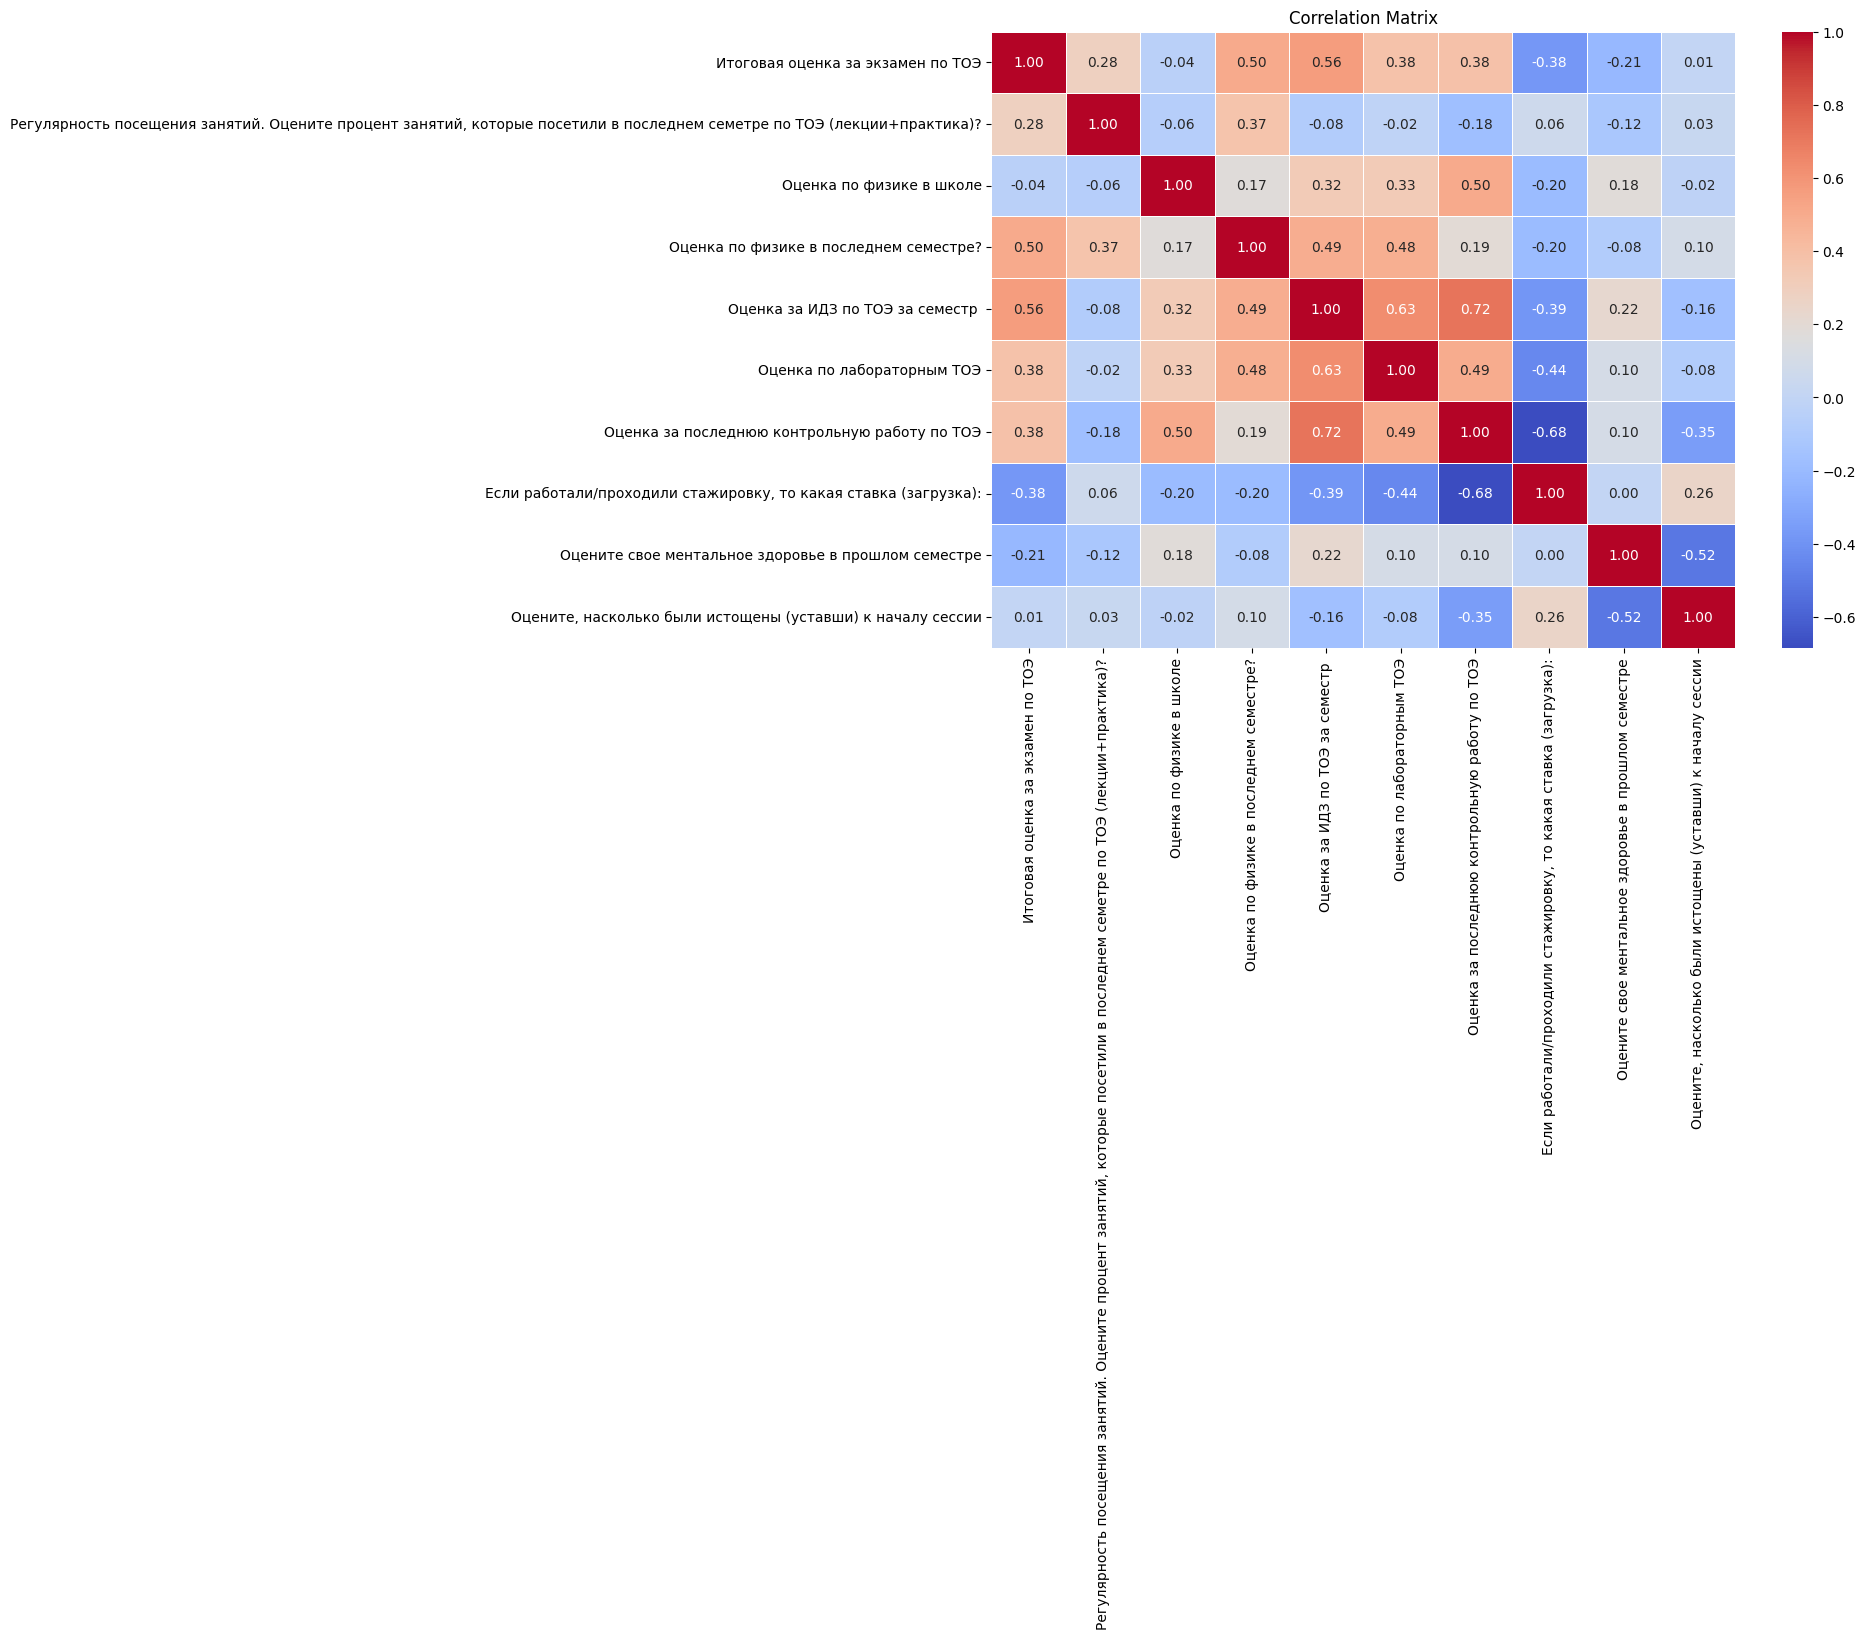

In [13]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



#### 3. Из корреляционной матрицы видно, что существует высокая корреляция между итоговой оценкой за экзамен по ТОЭ и оценкой по физике в последнем семестре, а также с оценкой за ИДЗ по ТОЭ. Немного ниже, корреляция наблюдается с оценкой по лабораторным работам. Признак о трудоустройстве не оказывает заметного влияния на итоговую оценку, однако мы включим его в модель для дальнейшего анализа его влияния.

In [30]:


columns_to_check = [
    'Итоговая оценка за экзамен по ТОЭ', 
    'Оценка по физике в последнем семестре?',
    'Оценка за ИДЗ по ТОЭ за семестр ',       
    'Оценка по лабораторным ТОЭ', 
    'В течении предыдущего семестра были трудоустроены и/или проходили стажировку?'
]


y = df['Итоговая оценка за экзамен по ТОЭ']
X = df[existing_columns[1:]] 

X.loc[:, 'В течении предыдущего семестра были трудоустроены и/или проходили стажировку?'] = X['В течении предыдущего семестра были трудоустроены и/или проходили стажировку?'].apply(
    lambda x: 1 if 'Да' in x or 'трудоустроены' in x or 'стажировка' in x else 0
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'Коэффициенты модели: {np.round(model.coef_, 2)}')
print(f'Свободный член: {round(model.intercept_, 2)}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {round(mean_squared_error(y_test, y_pred), 2)}')

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


Коэффициенты модели: [0.17 0.49 0.12 0.  ]
Свободный член: 0.43
Среднеквадратичная ошибка: 0.51


Модель показывает коэффициенты [0.17 0.49 0.12 0.  ], указывая на положительное влияние первых трех признаков на итоговую оценку, а четвертый признак не оказывает эффекта. Среднеквадратичная ошибка составляет 0.51, что говорит о хорошем качестве предсказания модели. 

### 4. Визуализируем результаты

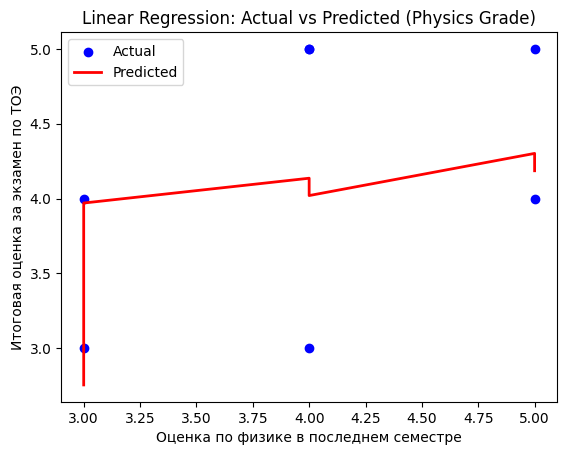

In [48]:
X_test_feature = X_test['Оценка по физике в последнем семестре?']

sorted_idx = X_test_feature.argsort()
X_test_sorted = X_test_feature.iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted')

plt.title('Linear Regression: Actual vs Predicted (Physics Grade)')
plt.xlabel('Оценка по физике в последнем семестре')
plt.ylabel('Итоговая оценка за экзамен по ТОЭ')
plt.legend()
plt.show()



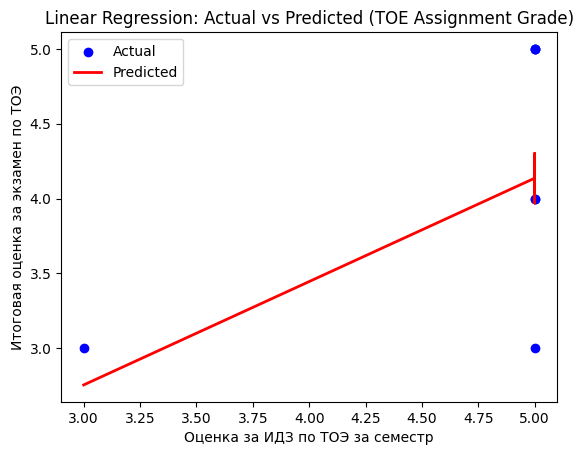

In [49]:
X_test_feature = X_test['Оценка за ИДЗ по ТОЭ за семестр ']

sorted_idx = X_test_feature.argsort()
X_test_sorted = X_test_feature.iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]


plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted')


plt.title('Linear Regression: Actual vs Predicted (TOE Assignment Grade)')
plt.xlabel('Оценка за ИДЗ по ТОЭ за семестр')
plt.ylabel('Итоговая оценка за экзамен по ТОЭ')
plt.legend()
plt.show()


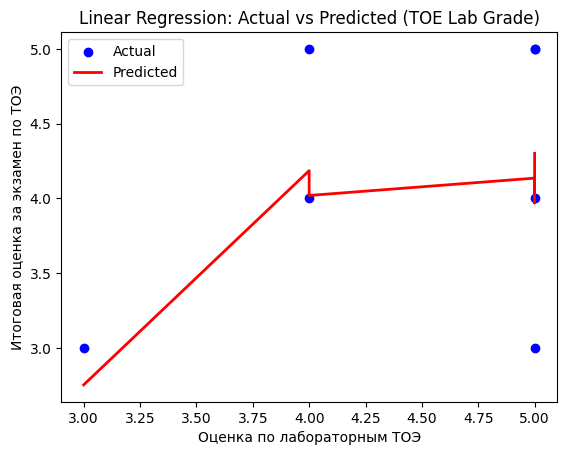

In [51]:
X_test_feature = X_test['Оценка по лабораторным ТОЭ']

sorted_idx = X_test_feature.argsort()
X_test_sorted = X_test_feature.iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted')


plt.title('Linear Regression: Actual vs Predicted (TOE Lab Grade)')
plt.xlabel('Оценка по лабораторным ТОЭ')
plt.ylabel('Итоговая оценка за экзамен по ТОЭ')
plt.legend()
plt.show()

